# M2 간단한 데이터 분석

- 데이터 불러오기
- 간단한 챠트 작성
- 기초적인 고객데이터 분석 연습 - 성별, 연령별, 지역별 고객수와 금액 분석
<br><br>
- **목표** : 파이썬을 사용한 데이터 분석 기초 연습


In [1]:
# 기본적으로 필요한 라이브러리 로딩

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.polynomial.polynomial import polyfit


# 자주 사용할만한 사용자 정의 함수 정의

# define random jitter
def rjitt(arr):
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

# custom min max scaler
def mnmx_scl(vec):
    vec = (vec-vec.min())/(vec.max()-vec.min())
    return(vec)


import warnings
# 경고 메시지 숨기기
warnings.filterwarnings('ignore')



# 데이터를 불러올 기본 위치 지정

# local data path
dataPath = 'D:/YONG/myPydata/' # 생성위치는 사용자 지정


# matplotlib 에서 한글을 표시하기 위한 설정

import matplotlib.font_manager
    
font_name = matplotlib.font_manager.FontProperties(
                fname="c:/Windows/Fonts/malgun.ttf"  # 윈도우즈의 한글 폰트 위치를 지정
            ).get_name()
matplotlib.rc('font', family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False #  음수를 나타내는 '-' 부호가 정상 표시되도록


## 파이썬 프로그래밍 감잡기 연습

In [2]:
# 하나의 값을 가진 변수

city = 'seoul'
city

'seoul'

In [3]:
# 지역명 변수

cities = ['서울', '여수', '부산', '대구', '제주'] # list 리스트
cities

['서울', '여수', '부산', '대구', '제주']

In [4]:
# 도시별 점포수 변수

cnt_stores = [3,1,2,4,1]
cnt_stores

[3, 1, 2, 4, 1]

In [5]:
# 지역의 갯수 확인

len(cities)

5

In [6]:
# 점포수 정렬 - default ascending

cnt_stores.sort()
print(cnt_stores)

[1, 1, 2, 3, 4]


In [7]:
# 점포수 정렬 - 내림차순

cnt_stores.sort(reverse=True)
print(cnt_stores)

[4, 3, 2, 1, 1]


In [8]:
# 요소 추가

cnt_stores.append(4)
cnt_stores

[4, 3, 2, 1, 1, 4]

- 리스트 처리 연습

In [9]:
nums = []
print(nums) #  empty list 

for i in range(10):
    print(i) # 몇번째 작업인지를 출력
    nums.append(3)
    print(nums) # nums의 현재 상태를 출력
nums    

[]
0
[3]
1
[3, 3]
2
[3, 3, 3]
3
[3, 3, 3, 3]
4
[3, 3, 3, 3, 3]
5
[3, 3, 3, 3, 3, 3]
6
[3, 3, 3, 3, 3, 3, 3]
7
[3, 3, 3, 3, 3, 3, 3, 3]
8
[3, 3, 3, 3, 3, 3, 3, 3, 3]
9
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

- [mini 연습문제] 아래 주어진 리스트 priceList에서 순서대로 한 값씩을 출력하는 반복문 for loop 코드를 작성하라

In [10]:
# 다섯개의 상품 가격이 하나의 리스트에 들어있다고 가정

priceList = [27, 35, 12, 29, 47]



In [11]:
nums + nums

# 하나의 코드셀에 여러 출력이 있으면 마지막 출력만 보여짐
# print() display() 등의 명령은 중간에 있는 출력도 보여지도록 강제함

print(nums + nums)
nums


[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

- 리스트 끼리를 더하는 표시의 연산(+) 는 두 개의 리스트를 하나로 결합하는 기능

In [12]:
nums.extend(nums)
nums

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

In [13]:
nums.insert(3, 'y')

# 3번위치, 즉 네번째 자리에 지정된 값을 원소로 추가

nums

[3, 3, 3, 'y', 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

In [14]:
del nums[:1] # 1번 자리 까지의 원소들을 삭제

nums

[3, 3, 'y', 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

- [mini 연습문제] 앞서 사용했던 priceList 리스트에서 4번째 이후의 값들을 삭제하라


In [15]:
nums.remove('y')
nums

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

In [16]:
nums.insert(2, 'y')
nums

[3, 3, 'y', 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

In [17]:
nums.reverse()
nums

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 'y', 3, 3]

In [18]:
nums.remove('y')
nums.insert(2, 2)
nums

[3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

In [19]:
sorted(nums)

[2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

In [20]:
nums # sorted 명령은 원래 값과 순서를 변경시키지 않음

[3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

In [21]:
nums.sort() # sort() 명령은 순서를 변경시킴
nums

[2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

In [22]:
nums1 = nums[:3]
nums1

[2, 3, 3]

In [23]:
# replicate a list

nums1 * 3, nums1

([2, 3, 3, 2, 3, 3, 2, 3, 3], [2, 3, 3])

In [24]:
min(nums1), max(nums1)

(2, 3)

In [25]:
4 in nums1  # 리스트에 어떤 값이 들어있는지 체크한 결과를 돌려줌 (return)

False

In [26]:
# 조건문 사용

listA = [4,'패션']

if 3 in listA:
    print('리스트에 3 값 포함')
else:
    print('리스트에 3 값 없음')
    
print('리스트의 내용', listA)    

리스트에 3 값 없음
리스트의 내용 [4, '패션']


## 쉬어가기 : 파이썬을 배워야할 7가지 이유

- Data Science & Machine Learning
- Main applications & more.
- Extensive Libraries & Framework
- Open Source.
- Can work with other programming languages.
- Improving productivity.
- Jobs & Careers.

https://pythonbasics.org/7-reasons-to-learn-python/

### 데이터프레임: 테이블

In [27]:
# 지역명 값
cities = ['서울', '여수', '부산', '대구', '제주']
# 도시별 점포수 값
cnt_stores = [3,1,2,4,1]

# 데이터프레임 테이블 생성
dfcitynstores = pd.DataFrame([cities, cnt_stores])
dfcitynstores

,0,1,2,3,4
0,서울,여수,부산,대구,제주
1,3,1,2,4,1


In [28]:
# 행렬 바꿈

dfcitynstores = dfcitynstores.T
dfcitynstores

,0,1
0,서울,3
1,여수,1
2,부산,2
3,대구,4
4,제주,1


In [29]:
# 컬럼명 변경

dfcitynstores.columns = ['city', 'cntStores']
dfcitynstores

,city,cntStores
0,서울,3
1,여수,1
2,부산,2
3,대구,4
4,제주,1


In [30]:
dfcitynstores.shape # rc 순서 r and then c 행렬

(5, 2)

In [31]:
dfcitynstores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   city       5 non-null      object
 1   cntStores  5 non-null      object
dtypes: object(2)
memory usage: 208.0+ bytes


In [32]:
# 데이터프레임 테이블 생성

dfcitynstores = pd.DataFrame() # 빈 데이터 프레임 생성
display(dfcitynstores)

dfcitynstores['city'] = cities  # 도시 리스트를 컬럼으로 추가
dfcitynstores['cntStores'] = cnt_stores

dfcitynstores

""


,city,cntStores
0,서울,3
1,여수,1
2,부산,2
3,대구,4
4,제주,1


In [33]:
dfcitynstores[dfcitynstores.city=='제주']

,city,cntStores
4,제주,1


In [34]:
dfcitynstores[dfcitynstores.city!='제주'] # 제주 이외의 도시들에 대한 레코드 (행) 들만 출력

,city,cntStores
0,서울,3
1,여수,1
2,부산,2
3,대구,4


<BarContainer object of 5 artists>

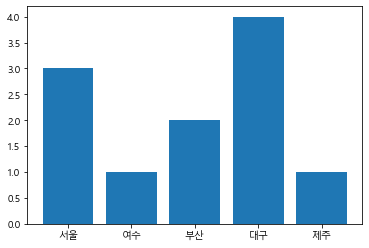

In [35]:
# 데이터프레임의 데이터를 시각화 - 막대챠트

plt.bar(dfcitynstores.city, dfcitynstores.cntStores)

In [36]:
# 데이터프레임에 새로운 컬럼 추가 연습

# 회원수 리스트 데이터
cntMbr = [100,200,100,200,100]



In [37]:
# 중첩된 다차원 리스트를 바로 데이터프레임으로 변경도 유용

# 리스트
vecA = [4,2,3]
# 리스트의 리스트
vecList = [vecA,vecA,vecA,vecA]

# 리스트의 리스트를 데이터프레임 테이블로
pd.DataFrame(vecList)

,0,1,2
0,4,2,3
1,4,2,3
2,4,2,3
3,4,2,3


## 데이터 불러오기 - 판매데이터

In [38]:
# 판매내역 테이블 불러오기
sales = pd.read_csv(dataPath + 'brk_salesmast01.csv', encoding='euc-kr')
sales = sales.drop(sales.columns[0], axis=1)

# 상품 테이블 불러오기
itemmast = pd.read_csv(dataPath + 'brk_itemmast01.csv', encoding='euc-kr')
itemmast = itemmast.drop(itemmast.columns[0], axis=1)

# 고객 테이블 불러오기
custmast = pd.read_csv(dataPath + 'brk_custmast01.csv', encoding='euc-kr')
custmast = custmast.drop(custmast.columns[0], axis=1)



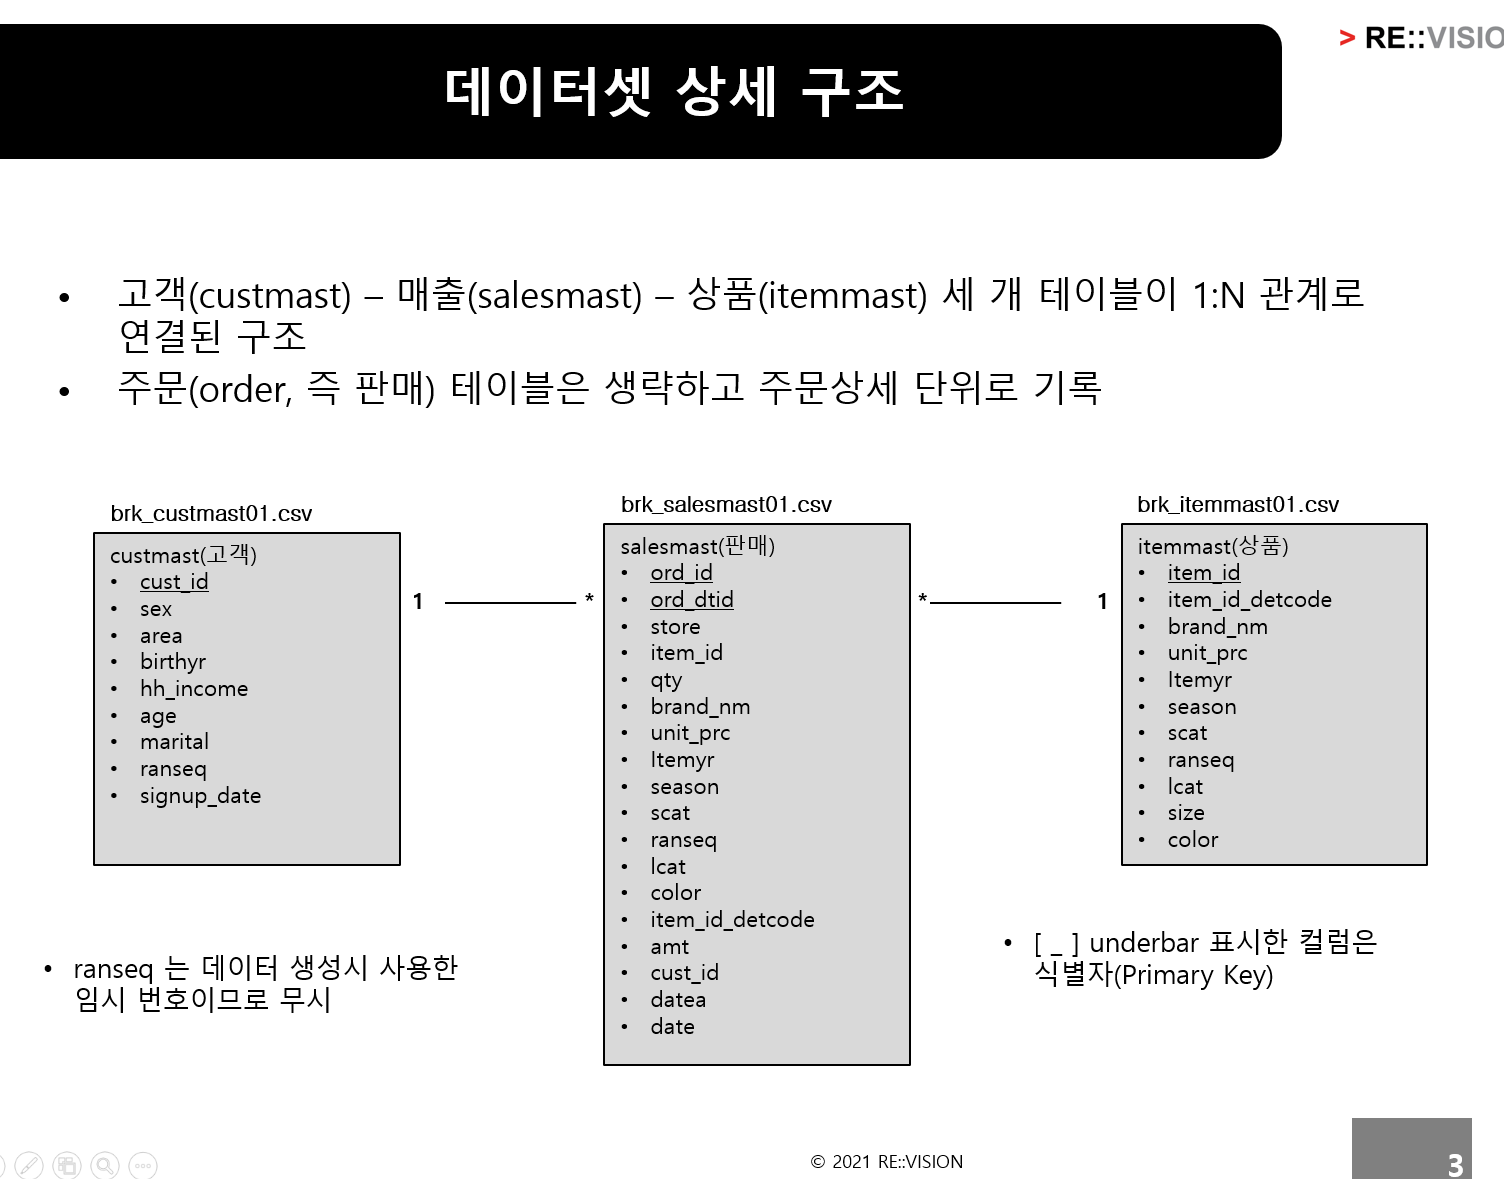

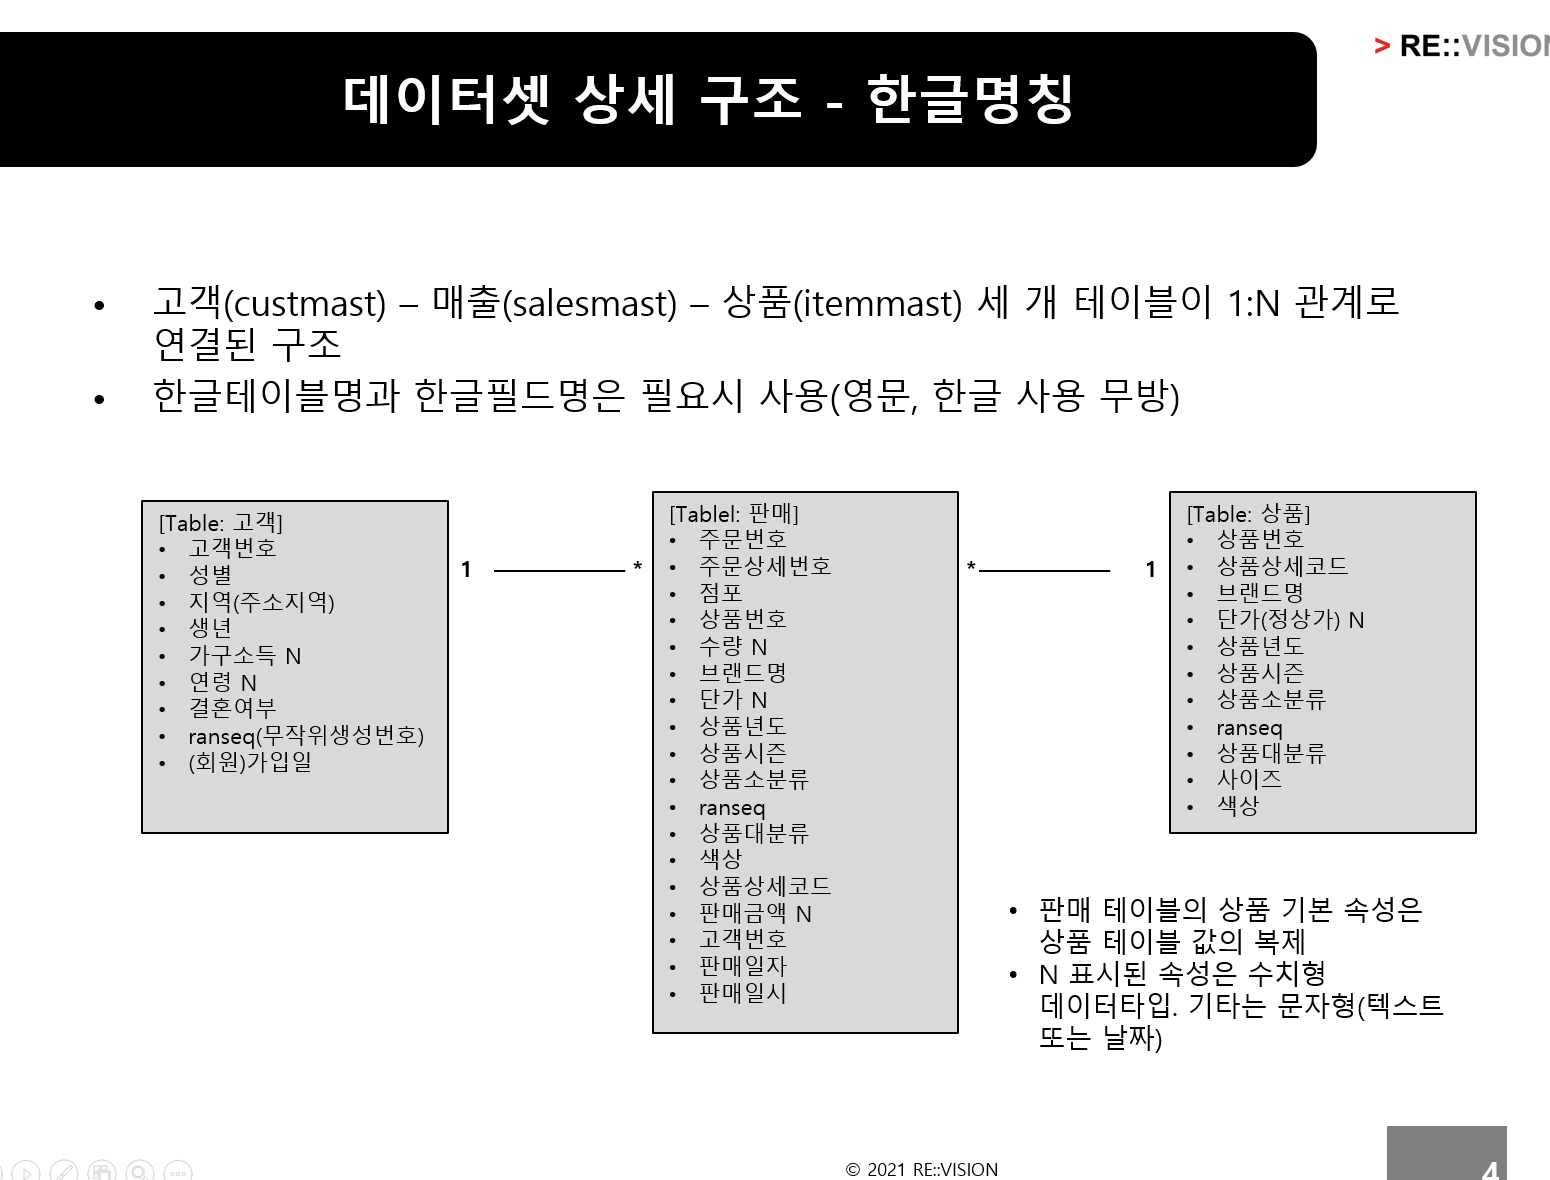

In [39]:
# 상품 테이블 보기

print(itemmast.shape) # (행, 열) 의 순서

itemmast.sample(5) # 무작위로 테이블(dataframe)의 5개 행만 뽑아서 (화면 출력)

(958, 11)


,item_id,brand_nm,unit_prc,itemyr,season,scat,ranseq,lcat,size,color,item_id_detcode
737,ES2004406,Esteeme,100000,2020,FW,치마,69,여성캐주얼,88,black,106
952,SH1009001,Shoote,60000,2020,FW,치마,9,여성캐주얼,66,grey,101
319,ES2002301,Esteeme,100000,2019,SS,바지,84,여성캐주얼,66,grey,101
195,SH1001709,Shoote,70000,2018,SS,바지,50,여성캐주얼,88,navy,109
810,SH1006901,Shoote,70000,2020,SS,바지,38,여성캐주얼,66,grey,101


In [40]:
# 판매 테이블 보기

print(sales.shape)
sales.sample(5)

(41936, 19)


,ord_id,ord_dtid,store,item_id,qty,brand_nm,unit_prc,itemyr,season,scat,ranseq,lcat,size,color,item_id_detcode,amt,cust_id,datea,date
13634,300161022,1,Multi bupyong,SH1003303,1,Shoote,70000,2019,AS,셔츠,13,남성캐주얼,95,check,103,70000,NaN,2019-07-15,2019-07-15 15:35:36.054647
24254,300298395,1,ONL,SH1002005,2,Shoote,70000,2018,SS,셔츠,19,남성캐주얼,105,blue,105,140000,B100040399,2019-09-30,2019-09-30 16:42:24.212559
37180,300503274,1,Shoote gasan,SH1003304,2,Shoote,70000,2019,AS,셔츠,13,남성캐주얼,105,white,104,140000,B100092683,2020-06-06,2020-06-06 15:57:39.430893
20381,300244842,1,Shoote gasan,SH1004001,1,Shoote,145000,2019,SS,바지,104,여성캐주얼,66,grey,101,145000,NaN,2019-10-25,2019-10-25 18:42:56.631432
16676,300199044,1,Shoote city,SH1006705,1,Shoote,130000,2020,SS,바지,96,여성캐주얼,77,black,105,130000,B100038924,2020-05-23,2020-05-23 17:41:06.468981


In [41]:
# 판매 테이블 컬럼명 확인

sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41936 entries, 0 to 41935
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ord_id           41936 non-null  int64 
 1   ord_dtid         41936 non-null  int64 
 2   store            41936 non-null  object
 3   item_id          41936 non-null  object
 4   qty              41936 non-null  int64 
 5   brand_nm         41936 non-null  object
 6   unit_prc         41936 non-null  int64 
 7   itemyr           41936 non-null  int64 
 8   season           41936 non-null  object
 9   scat             41936 non-null  object
 10  ranseq           41936 non-null  int64 
 11  lcat             41936 non-null  object
 12  size             41936 non-null  int64 
 13  color            41936 non-null  object
 14  item_id_detcode  41936 non-null  int64 
 15  amt              41936 non-null  int64 
 16  cust_id          28586 non-null  object
 17  datea            41936 non-null

In [42]:
#  컬럼명만 보기

sales.columns

# np.array(sales.columns)

Index(['ord_id', 'ord_dtid', 'store', 'item_id', 'qty', 'brand_nm', 'unit_prc',
       'itemyr', 'season', 'scat', 'ranseq', 'lcat', 'size', 'color',
       'item_id_detcode', 'amt', 'cust_id', 'datea', 'date'],
      dtype='object')

In [43]:
# 고객 테이블 데이터 확인

print(custmast.shape) # 행과 열의 순서 --> 행렬 (RC == row and column)
custmast.sample(5)

(26000, 9)


,cust_id,sex,area,birthyr,hh_income,age,marital,ranseq,signup_date
19208,B100019683,F,gangwon,1992,18000,29,미혼,19208,2017-04-12 11:11:27.243860
25722,B100007508,M,gyunggi,1990,20000,31,미혼,25722,2018-03-06 11:11:27.243860
18389,B100005328,F,gyunggi,1975,48000,46,기혼,18389,2019-02-12 11:11:27.243860
2037,B100061637,M,gyunggi,1991,70000,30,미혼,2037,2020-05-25 11:11:27.243860
3648,B100043227,M,gangwon,1991,60000,30,미혼,3648,2016-05-02 11:11:27.243860


In [44]:
# 고객리스트에는 2년간 판매내역에 있는 고객만 포함 (적절? 과거 고객이라면?)

print(custmast.shape)
custmast = custmast[custmast.cust_id.isin(sales.cust_id)]
print(custmast.shape)

# 상품리스트에는 2년간 판매내역에 있는 상품만 포함 (적절? 과거 상품이라면?)

print(itemmast.shape)
itemmast = itemmast[itemmast.item_id.isin(sales.item_id)]
print(itemmast.shape)

(26000, 9)
(15565, 9)
(958, 11)
(958, 11)


## 성별 연령별 고객수 분석 연습

In [45]:
# 연습용 데이터 생성 - 200명의 고객 sample

cust1 = custmast[custmast.cust_id.isin(sales[['cust_id']].drop_duplicates().sample(200).cust_id)]
cust1 = cust1[['cust_id', 'age','sex', 'area']]

print(cust1.shape)
cust1.sample(5)

(200, 4)


,cust_id,age,sex,area
6360,B100083160,41,M,seoul
15971,B100038172,32,M,seoul
3416,B100010355,33,F,gyunggi
1980,B100058772,40,M,seoul
17457,B100023326,62,F,gyunggi


In [46]:
# sample 고객리스트에 대한 구매금액 추가

cust1amts = sales[sales.cust_id.isin(cust1.cust_id)][['cust_id', 'amt']].groupby('cust_id').sum().reset_index()
cust1 = cust1.merge(cust1amts, how='left', on='cust_id')
print(cust1.shape)
cust1.sample(5)

(200, 5)


,cust_id,age,sex,area,amt
35,B100037109,32,M,seoul,335000
174,B100020383,24,F,seoul,315000
126,B100000780,40,M,gyunggi,70000
148,B100098162,39,F,inchon,60000
80,B100063267,34,F,seoul,440000


In [47]:
# 성별 고객수 집계

cust1.sex.value_counts()

F    143
M     57
Name: sex, dtype: int64

In [48]:
# 데이터프레임의 형식으로 바꿔서 보기

pd.DataFrame(cust1.sex.value_counts())

,sex
F,143
M,57


<AxesSubplot:>

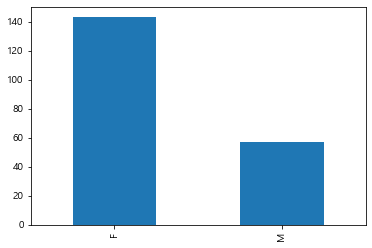

In [49]:
# 성별 인원수 시각화 - 막대 챠트 작성

cust1.sex.value_counts().plot(kind='bar')

In [50]:
# 연령별 고객수 - 고객수순 정렬

cust1.age.value_counts()

34    19
31    17
32    14
29    13
38    10
40    10
28     9
26     9
46     7
24     6
27     6
43     6
35     6
23     5
30     5
36     5
41     5
60     5
42     5
56     4
33     3
44     3
58     3
57     3
37     3
53     2
25     2
22     2
39     2
21     2
45     2
62     1
61     1
64     1
50     1
48     1
47     1
55     1
Name: age, dtype: int64

In [51]:
# 성별과 지역의 교차표 생성

pd.crosstab(cust1.sex, cust1.area)

area,gangwon,gyunggi,inchon,seoul
sex,,,,
F,14,42,36,51
M,7,16,13,21


<AxesSubplot:xlabel='sex'>

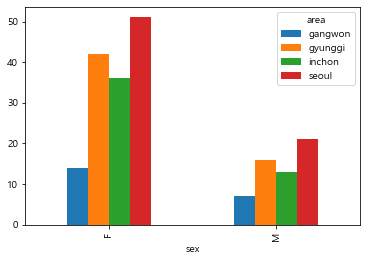

In [52]:
# 교차표 시각화

pd.crosstab(cust1.sex, cust1.area).plot(kind='bar')

<AxesSubplot:xlabel='area'>

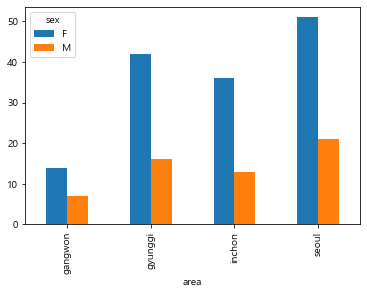

In [53]:
# 지역과 성별 순서 변경

pd.crosstab(cust1.sex, cust1.area).T.plot(kind='bar')

In [54]:
# 연령별 고객수 - 연령순 정렬

cust1.age.value_counts().sort_index()

21     2
22     2
23     5
24     6
25     2
26     9
27     6
28     9
29    13
30     5
31    17
32    14
33     3
34    19
35     6
36     5
37     3
38    10
39     2
40    10
41     5
42     5
43     6
44     3
45     2
46     7
47     1
48     1
50     1
53     2
55     1
56     4
57     3
58     3
60     5
61     1
62     1
64     1
Name: age, dtype: int64

<AxesSubplot:>

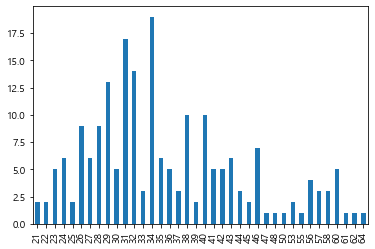

In [55]:
# 고객 연령 분포 시각화

cust1.age.value_counts().sort_index().plot(kind='bar')

In [56]:
# [질문] 챠트를 자세히 보면 50세 막대는 없는데 잘못된 것은 아닌가?

# 만일 잘못된 것이 아니라면, 챠트를 어떻게 수정해야 하는가?


In [57]:
# 5세 단위 연령 집단 코드 부여

cust1['age_grp'] = round(cust1.age/5)*5
cust1

,cust_id,age,sex,area,amt,age_grp
0,B100028570,31,M,seoul,400000,30.0
1,B100038272,31,F,seoul,300000,30.0
2,B100028694,31,F,inchon,630000,30.0
3,B100010230,56,F,seoul,0,55.0
4,B100096351,32,M,inchon,80000,30.0
...,...,...,...,...,...,...
195,B100088172,34,F,gangwon,210000,35.0
196,B100094064,34,F,seoul,285000,35.0
197,B100089696,46,F,gangwon,70000,45.0
198,B100087499,38,F,seoul,140000,40.0


In [58]:
# 연령구분 코드 생성 과정 step별로 살펴보기

# 원래의 연령 값
display(cust1.head(5).age)

# 5세 단위로 자동 구분하기 위해 5로 나눔
display(cust1.head(5).age/5)

#  소수점을 없애기 round 반올림
display(round(cust1.head(5).age/5))

# 5로 나눴던 값을 원래로 바꾸기 위해 다시 5를 곱함
display(round(cust1.head(5).age/5)*5)

0    31
1    31
2    31
3    56
4    32
Name: age, dtype: int64

0     6.2
1     6.2
2     6.2
3    11.2
4     6.4
Name: age, dtype: float64

0     6.0
1     6.0
2     6.0
3    11.0
4     6.0
Name: age, dtype: float64

0    30.0
1    30.0
2    30.0
3    55.0
4    30.0
Name: age, dtype: float64

<AxesSubplot:>

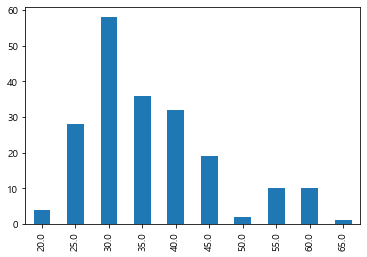

In [59]:
# 고객 연령 분포 시각화 - 연령 집단 5세 단위 기준

cust1.age_grp.value_counts().sort_index().plot(kind='bar')

In [60]:
# 10세 단위 연령 집단 코드 부여

cust1['age_grp'] = round(cust1.age/10)*10
cust1

,cust_id,age,sex,area,amt,age_grp
0,B100028570,31,M,seoul,400000,30.0
1,B100038272,31,F,seoul,300000,30.0
2,B100028694,31,F,inchon,630000,30.0
3,B100010230,56,F,seoul,0,60.0
4,B100096351,32,M,inchon,80000,30.0
...,...,...,...,...,...,...
195,B100088172,34,F,gangwon,210000,30.0
196,B100094064,34,F,seoul,285000,30.0
197,B100089696,46,F,gangwon,70000,50.0
198,B100087499,38,F,seoul,140000,40.0


Text(0.5, 1.0, '고객 연령 분포 - 10세 단위 집단')

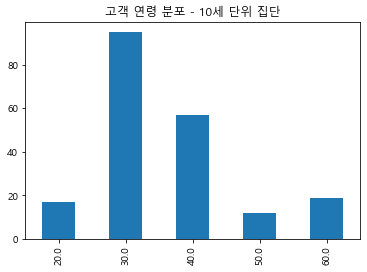

In [61]:
# 고객 연령 분포 시각화 - 연령 집단 10세 단위 기준

cust1.age_grp.value_counts().sort_index().plot(kind='bar')
plt.title('고객 연령 분포 - 10세 단위 집단') # 챠트에 제목 달아주기

In [62]:
# 반올림을 사용한 연령집단 구분 부여 결과 확인
# 연령과 연령집단 비교

pd.concat([cust1.sort_values('age').head(20), cust1.sort_values('age').tail(20)])

,cust_id,age,sex,area,amt,age_grp
169,B100090327,21,F,gangwon,215000,20.0
6,B100063904,21,F,inchon,400000,20.0
145,B100034079,22,F,seoul,100000,20.0
157,B100065803,22,F,inchon,260000,20.0
159,B100096236,23,F,seoul,140000,20.0
137,B100030007,23,F,seoul,230000,20.0
131,B100056733,23,F,seoul,130000,20.0
97,B100060266,23,F,seoul,100000,20.0
87,B100002934,23,F,seoul,325000,20.0
104,B100050705,24,F,seoul,35000,20.0


In [63]:
# 집단 나누기 연습

a = np.array([30,31,32,33])
print(a)
print(a/5)

print(np.round(a/5)*5) # 반올림
print(np.floor(a/5)*5) # 내림
print(np.ceil(a/5)*5)  # 올림

[30 31 32 33]
[6.  6.2 6.4 6.6]
[30. 30. 30. 35.]
[30. 30. 30. 30.]
[30. 35. 35. 35.]


In [64]:
# 고객별 금액에 대한 집계

# 전체 고객의 합계와 # 각 고객의 평균
cust1.amt.sum(), cust1.amt.mean()

(43758000, 218790.0)

In [65]:
# 성별 금액 집계 -- 합계

cust1[['sex','amt']].groupby('sex').sum()

,amt
sex,
F,34508000
M,9250000


In [66]:
cust1[['sex','amt']].groupby('sex').sum().reset_index() # index 값을 컬럼으로 변경

,sex,amt
0,F,34508000
1,M,9250000


,sex,amt
0,F,241314.685315
1,M,162280.701754


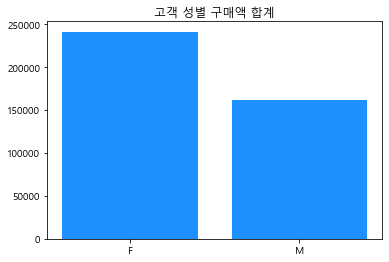

In [67]:
# 성별 평균 구하기
custamts1 = cust1[['sex','amt']].groupby('sex').mean().reset_index()

display(custamts1)

# 성별 금액 합계 구하기
custamts2 = custamts1.groupby('sex').sum().reset_index()

# 막대 챠트 생성 -- 시각화
plt.bar(custamts2.sex, custamts2.amt, color='dodgerblue')
plt.title('고객 성별 구매액 합계')
plt.show()

[mini연습문제] 
1. 샘플 데이터인 cust1을 사용하여 지역별 금액평균을 구한 후
2. 지역별 금액 평균을 나타내는 막대 챠트를 생성하라

[mini연습문제] 
1. 샘플 데이터인 cust1에서 남성고객만 추출한 후
2. 지역별로 합계금액을 구한 후
3. 지역별 합계금액을 나타내는 막대 챠트를 생성하라

### 산점도를 사용한 시각화

- 산점도 scatter plot 은 X, Y 두 개의 축에 어떤 값을 좌표로 가진 점들을 표시
- X와 Y 두 변수 간의 관계를 파악하는데 유용
- 예: 키와 몸무게

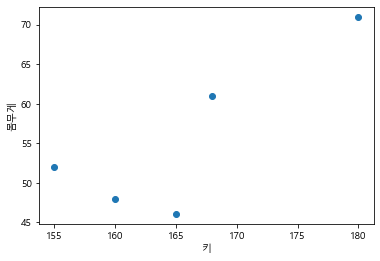

In [68]:
listHeight = [160, 165, 180, 155, 168]
listWeight = [48, 46, 71, 52, 61]

# 산점도에 X, Y 두 축에 해당하는 값 리스트 지정
plt.scatter(listHeight, listWeight)
plt.xlabel('키')
plt.ylabel('몸무게')
plt.show()

- 고객 데이터를 사용한 scatter 생성 예제

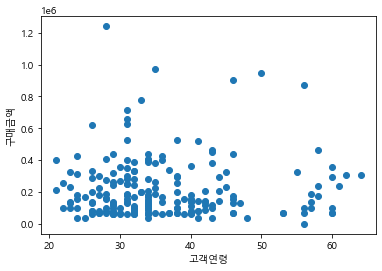

In [69]:
# 산점도에 X, Y 두 축에 해당하는 값 리스트 지정

# X는 연령, Y는 구매금액
plt.scatter(cust1.age, cust1.amt)
plt.xlabel('고객연령')
plt.ylabel('구매금액')
plt.show()

[mini연습문제]

1. X축에 구매금액을 Y축에 고객연령을 표시하는 산점도를 생성하라


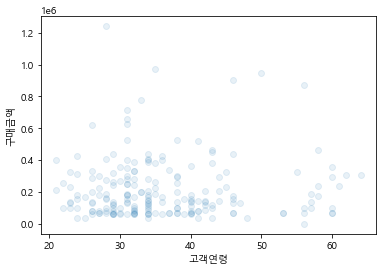

In [70]:
# 질문: 혹시 동일한 좌표에 여러 명의 고객이 존재하는 것은 아닌가?

# alpha 옵션을 사용
plt.scatter(cust1.age, cust1.amt,
           alpha=0.1) # 투명도를 높임
plt.xlabel('고객연령')
plt.ylabel('구매금액')
plt.show()

# 흐리게 표시된 점은 해당 좌표에 고객이 1명만 존재한다는 것
# 진하게 표시된 점은 해당 좌표에 고객이 여러 명 존재한다는 것

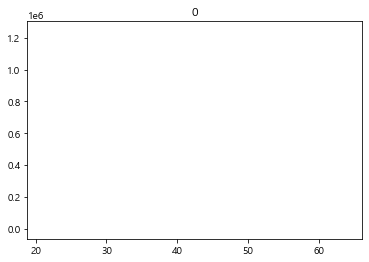

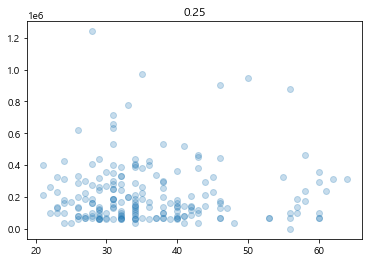

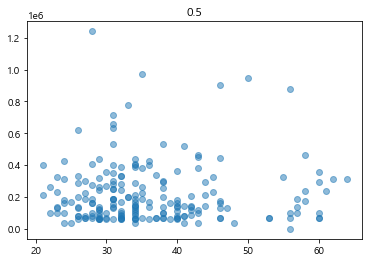

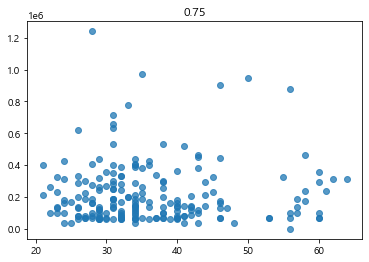

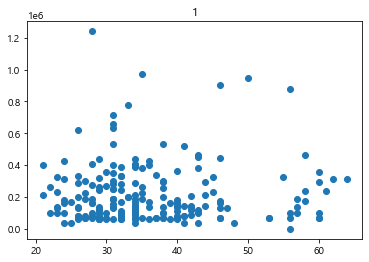

In [71]:
# 투명도의 의미 이해

for i in [0, 0.25, 0.5, 0.75, 1]:
    plt.scatter(cust1.age, cust1.amt,
               alpha=i) # 투명도를 조절
    plt.title(i)
    plt.show()

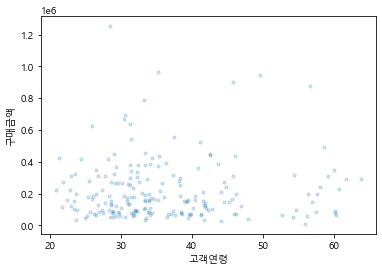

In [72]:
# 동일 좌표에 여러 점이 있는 문제를 피하기 위해
# rjitt 사용자정의함수를 적용해 점을 약간 분산시킴

plt.scatter(rjitt(cust1.age), rjitt(cust1.amt),
            alpha=0.2, # 투명도를 높임
            s=10) # 점의 크기를 줄임
plt.xlabel('고객연령')
plt.ylabel('구매금액')
plt.show()

- **jitter** (rjitt 은 사용자정의) 함수는 무작위로 약간의 값을 변경해서 점을 분산시키는 효과


In [73]:
# rjitt을 사용한 무작위 값 분산 예제 

rjitt([2,2,2,2,3,3,3,3,3])

array([2.00949155, 2.01001982, 1.99317021, 2.01360246, 3.01076709,
       3.00540594, 3.0042729 , 2.99906274, 2.99908105])

(1.5, 3.5)

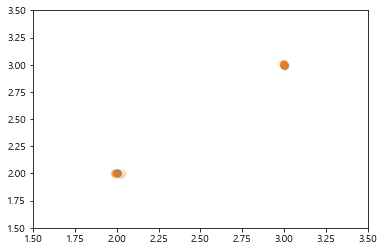

In [74]:
valueList = [2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3]

plt.scatter(valueList, valueList, alpha=0.2, s=50)
plt.scatter(rjitt(valueList), rjitt(valueList), alpha=0.2, s=50)
plt.xlim(1.5,3.5)
plt.ylim(1.5,3.5)

- **해석 측면의 질문 :** 산점도를 보면 나이가 많은 고객일수록 구매금액이 큰 관계가 존재하는가?

#### [연습문제]

1. 성별X연령별 고객수와 고객당 평균 구매금액을 집계한 데이터프레임을 생성하라
2. 집계한 데이터프레임으로 고객수와 금액을 축으로한 산점도 scatter plot을 생성하라

In [75]:
# 1. 성별X연령별 고객수와 고객당 평균 구매금액을 집계한 데이터프레임을 생성하라


custSumm = cust1[['sex','age', 'amt']].groupby(['sex', 'age']).agg(['count','mean']).reset_index()
custSumm.tail()

sex age   amt          
           count      mean
49   M  41     4   85000.0
50   M  42     2  142500.0
51   M  44     1  145000.0
52   M  53     2   70000.0
53   M  57     1  190000.0

In [76]:
custSumm1 = custSumm.copy() 

custSumm1.columns = ['sex','age', 'cntCust', 'mean_sale_amt']
custSumm1.tail()

,sex,age,cntCust,mean_sale_amt
49,M,41,4,85000.0
50,M,42,2,142500.0
51,M,44,1,145000.0
52,M,53,2,70000.0
53,M,57,1,190000.0


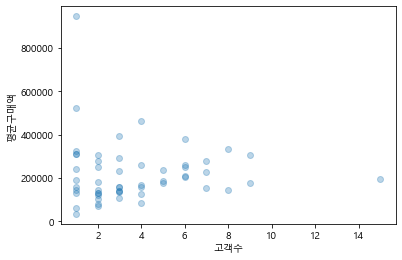

In [77]:
# 2. 집계한 데이터프레임으로 고객수와 금액을 축으로한 산점도 scatter plot을 생성하라

plt.scatter(custSumm1.cntCust, custSumm1.mean_sale_amt, 
            alpha=0.3)
plt.xlabel('고객수')
plt.ylabel('평균구매액')
plt.show()

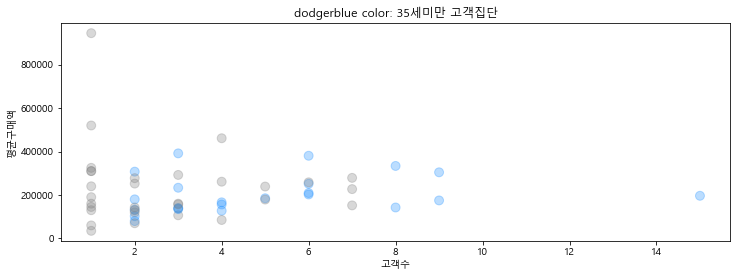

In [78]:
# 해상도 높은 챠트 이미지 생성해 저장

colors1 = np.where(custSumm1.age<35, 'dodgerblue', 'grey')
plt.figure(figsize=(12,4))
plt.scatter(custSumm1.cntCust, custSumm1.mean_sale_amt, 
            alpha=0.3, color=colors1, s=80)
plt.title('dodgerblue color: 35세미만 고객집단')
plt.xlabel('고객수')
plt.ylabel('평균구매액')
# plt.savefig("Higherresoltion.png",dpi=200)
plt.show()

### 히스토그램을 사용한 분포 확인

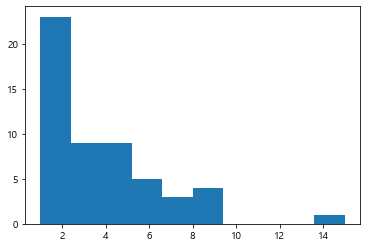

In [79]:
# 추가 분석 : X의 값 분포 확인

# hist 히스토그램 histogram 사용
plt.hist(custSumm1.cntCust)
plt.show()

- **histogram** 히스토그램 (도수분포 챠트) 은 값들을 일정한 수의 구간으로 나눠 각 구간에 속하는 값들을 수를 구한 후 챠트로 표시한 것 
- histogram을 사용하면 값들의 분포를 한 눈에 파악할 수 있음

(array([ 8., 24., 13.,  6.,  1.,  1.,  0.,  0.,  0.,  1.]),
 array([ 35000., 126000., 217000., 308000., 399000., 490000., 581000.,
        672000., 763000., 854000., 945000.]),
 <BarContainer object of 10 artists>)

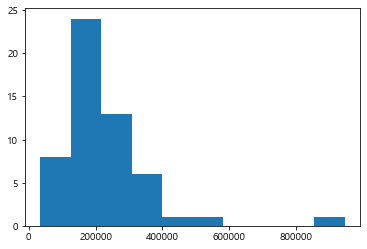

In [80]:
# 추가 분석 : Y의 값 분포 확인

plt.hist(custSumm1.mean_sale_amt)

### 추가 연습문제
- 상품마스터 테이블(itemmast)을 사용해서 브랜드별 대분류별 상품수와 평균가격을 분석하라

## Summary

- 파이썬에는 일반적인 프로그래밍 기능에 더해서 데이터 테이블의 집계, 가공, 데이터 시각화 등의 추가 기능 존재
- 이러한 기능들을 조합하면 분포나 변수들간 관계, 추세변화 파악 등 다양한 데이터 분석 가능함
- 단, 수많은 기능들이 존재하므로 (처음부터) 모두를 익히려고 하기 보다는 **실무에서 자주 사용될 주요 기능들을 먼저** 숙지하기를 권장